In [1]:
import numpy as np
import einops as e
import PIL.Image as Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow as show

In [2]:
image = Image.open('image.png')
image = np.array(image)
images = image.reshape((6, 96, 96, 3))

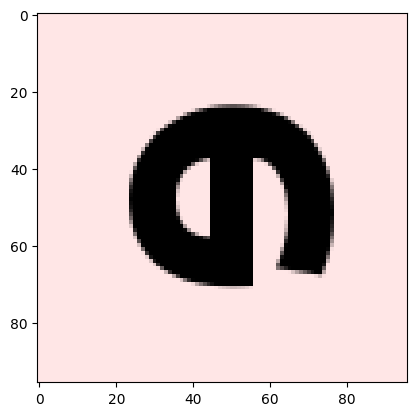

In [3]:
show(e.rearrange(images[0], 'h w c -> w h c'))

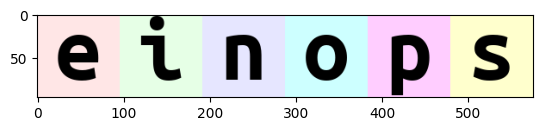

In [4]:
show(e.rearrange(images, 'n h w c -> h (n w) c'))

In [5]:
e.rearrange(images, 'b h w c -> (b h) (w c)').shape

(576, 288)

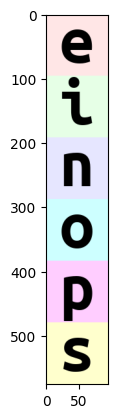

In [6]:
show(e.rearrange(images, '(row col) h w c -> (row h) (col w) c', row=6))

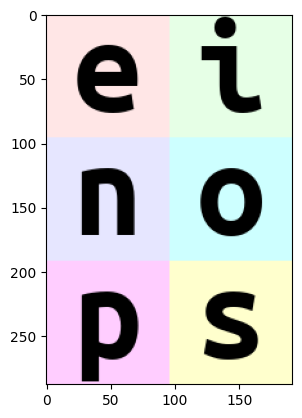

In [7]:
show(e.rearrange(images, '(i j) h w c -> (i h) (j w) c', j=2))

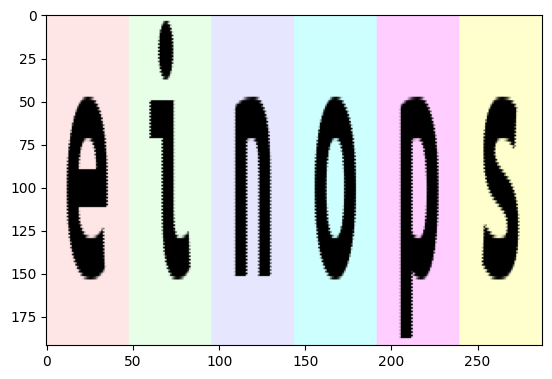

In [8]:
show(e.rearrange(images, 'b h (w x) c -> (h x) (b w) c', x=2))

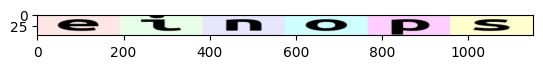

In [9]:
show(e.rearrange(images, 'b (h x) w c -> h (b w x) c', x=2))

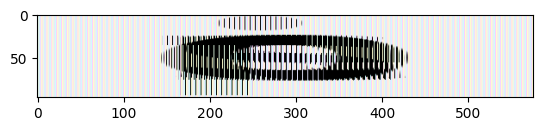

In [10]:
show(e.rearrange(images, 'b h w c -> h (w b) c'))

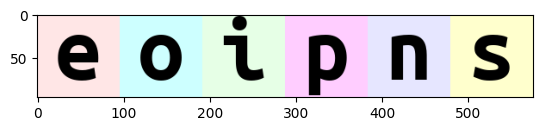

In [11]:
show(e.rearrange(images, '(b1 b2 b3) h w c -> h (b3 b2 b1 w) c', b1=1, b2=2))

Reduce Operation

In [12]:
images = images.astype(float) / 255.0

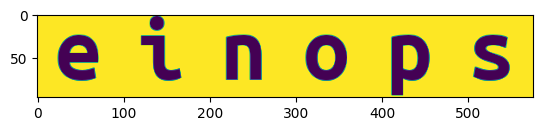

In [13]:
show(e.reduce(images, 'b h w c -> h (b w)', 'mean'))

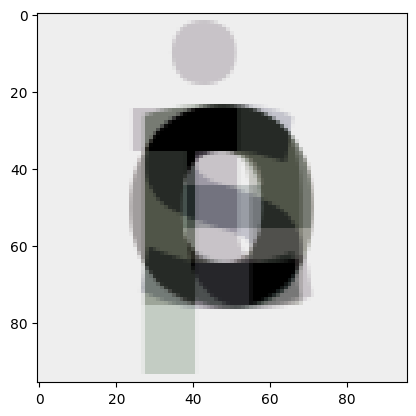

In [14]:
show(e.reduce(images, 'b h w c -> h w c', 'mean'))

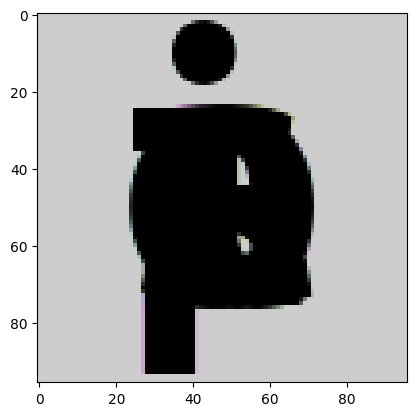

In [15]:
show(e.reduce(images, 'b h w c -> h w c', 'min'))

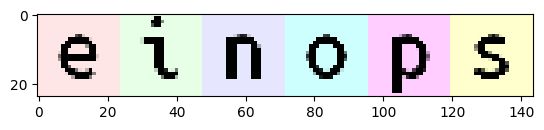

In [16]:
image = e.reduce(images, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=4, w2=4)
show(image)

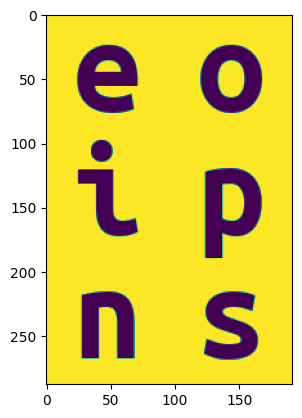

In [17]:
image = e.reduce(images, '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2)
show(image)

In [18]:
image = e.rearrange(images, 'b h w c -> 1 b h w c')
image = e.rearrange(image, '1 b h w c -> b h w c')
image.shape

(6, 96, 96, 3)

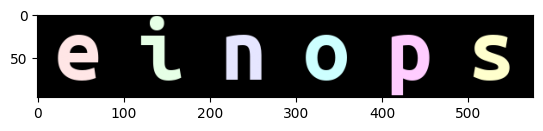

In [19]:
image = e.reduce(images, 'b h w c -> b () () c', 'max') - images
image = e.rearrange(image, 'b h w c -> h (b w) c')
show(image)

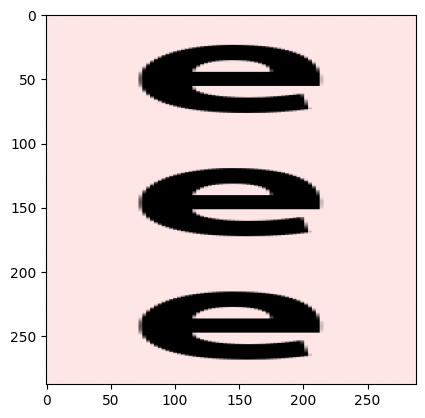

In [20]:
show(e.repeat(images[0], 'h w c -> (3 h) (w 3) c'))

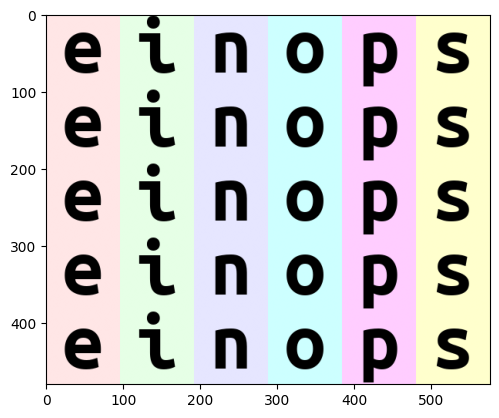

In [21]:
image = e.repeat(images, 'b h w c -> (5 h) (b w) c')
show(image)

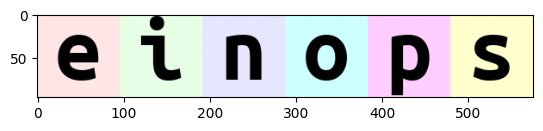

In [22]:
show(e.reduce(image, '(5 h) w c -> h w c', 'mean'))

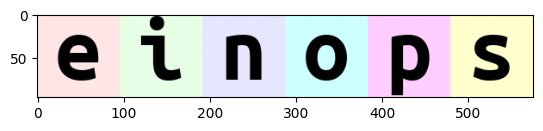

In [23]:
show(e.rearrange(images, 'b h w c -> h (b w) c'))

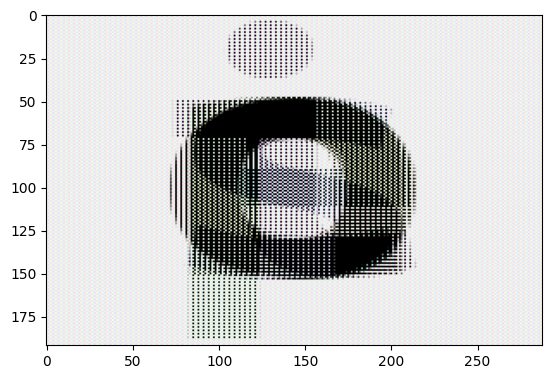

In [24]:
image = e.rearrange(images, '(b1 b2) h w c -> (h b1) (w b2) c', b1=2)
show(image)

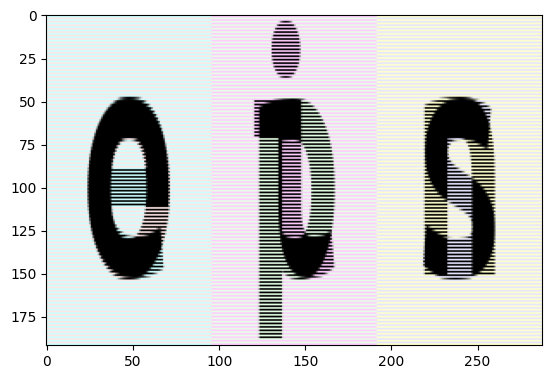

In [25]:
image = e.rearrange(images, '(b1 b2) h w c -> (h b1) (b2 w) c', b1=2)
show(image)

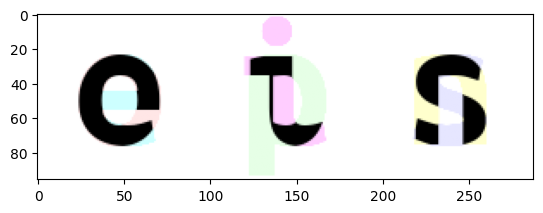

In [26]:
image = e.reduce(images, '(b1 b2) h w c -> h (b2 w) c', 'max', b1=2)
show(image)

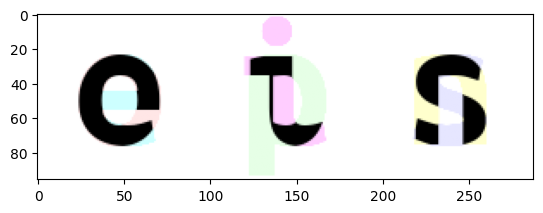

In [27]:
import torch

image = torch.tensor(images)
B, H, W, C = image.size()
image = torch.permute(image.reshape((2, 3, H, W, C)).max(axis=0).values, (1, 0, 2, 3))
image = torch.flatten(image, 1, 2)
show(image)

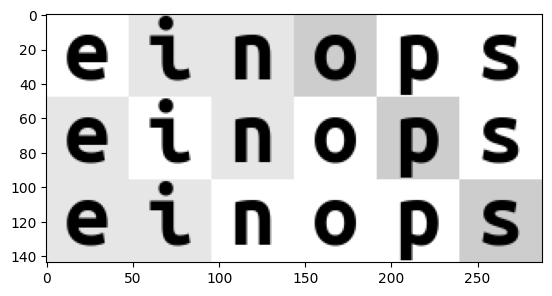

In [28]:
image = torch.tensor(images)
image = e.reduce(image, 'b (h 2) (w 2) c -> (c h) (b w) 1', 'mean')
show(image, cmap='gray')

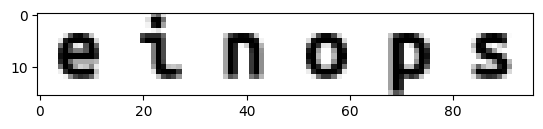

In [29]:
image = torch.tensor(images)
image = e.reduce(image, 'b (h 6) (w 6) c -> h (b w)', 'mean')
show(image, cmap='gray')

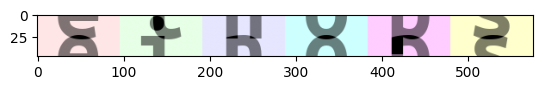

In [30]:
image = e.reduce(images, 'b (2 h) w c -> h (b w) c', 'mean')
show(image)

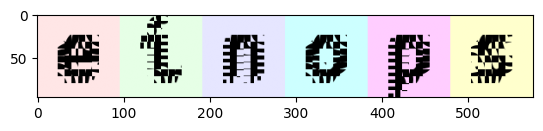

In [31]:
image = e.rearrange(images, 'b (h p1) (w p2) c -> (h p2) (b w p1) c', p1=8, p2=8)
show(image)

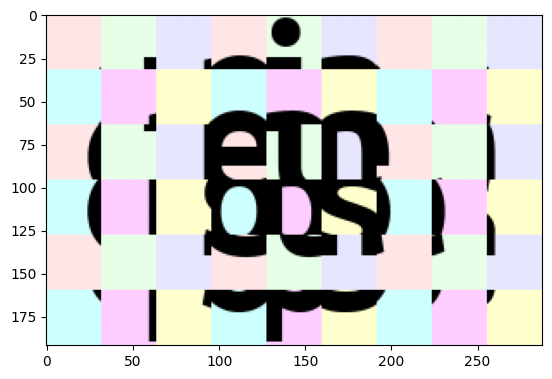

In [32]:
image = e.rearrange(images, '(b1 b2) (h1 h) (w1 w) c -> (h1 b1 h) (w1 b2 w) c', h1=3, w1=3, b1=2)
show(image)

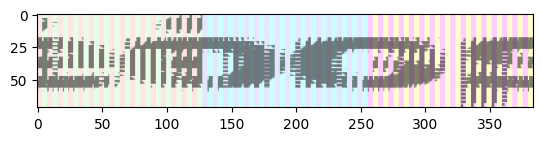

In [33]:
image = e.reduce(images, '(b1 b2) (h h1) (2 w w1) c -> (h w1) (b1 w b2 h1) c', 'mean', b1=3, w1=3, h1=4)
show(image)

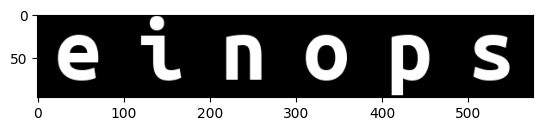

In [35]:
image = torch.tensor(images)
max_val = e.reduce(image, 'b h w c -> b 1 1 c', 'max')
image2 = torch.abs(image - max_val)
image2 = (image2 - e.reduce(image2, 'b h w c -> b 1 1 c', 'min')) / (e.reduce(image2, 'b h w c -> b 1 1 c', 'max') - e.reduce(image2, 'b h w c -> b 1 1 c', 'min'))
show(e.rearrange(image2, 'b h w c -> h (b w) c'))

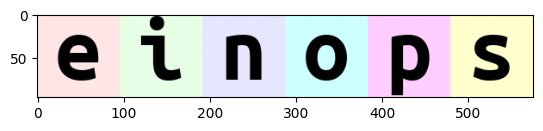

In [36]:
image = torch.tensor(images)
show(e.rearrange(image, 'b h w c -> h (b w) c'))

torch.Size([6, 16, 12, 3])

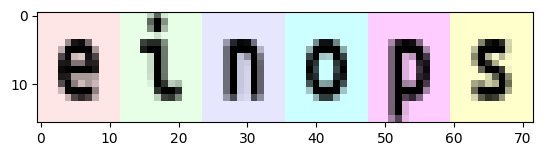

In [37]:
image = e.reduce(image, 'b (h h1) (w w1) c -> b h w c', 'mean', h1=6, w1=8)
show(e.rearrange(image, 'b h w c -> h (b w) c'))
image.shape

torch.Size([6, 96, 96, 3])

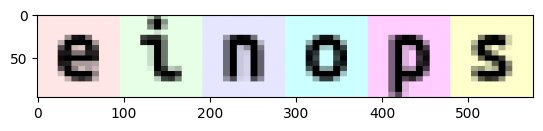

In [38]:
image = e.repeat(image, 'b h w c -> b (h h1) (w w1) c', h1=6, w1=8)
show(e.rearrange(image, 'b h w c -> h (b w) c'))
image.shape

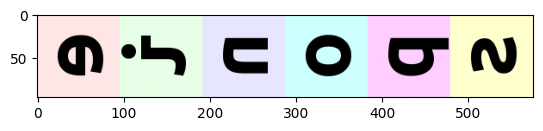

In [39]:
image = torch.tensor(images)
show(e.rearrange(image, 'b h w c -> w (b h) c'))

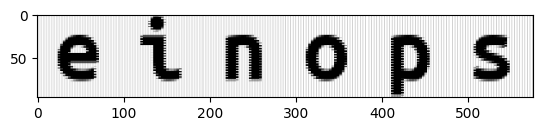

In [40]:
image = torch.tensor(images)
show(e.reduce(image, 'b (h 3) (w w2) c -> (h w2) (b w c)', 'mean', w2=3), cmap='gray')

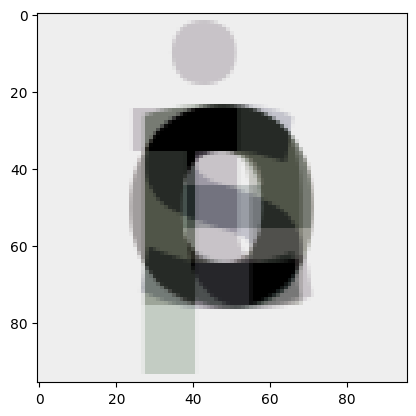

In [43]:
mean_image = e.reduce(images, 'b h w c -> h w c', 'mean')
show(mean_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


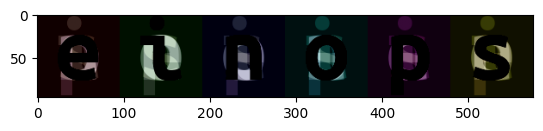

In [45]:
image = images - e.repeat(mean_image, 'h w c -> 1 h w c')
show(e.rearrange(image, 'b h w c -> h (b w) c'))

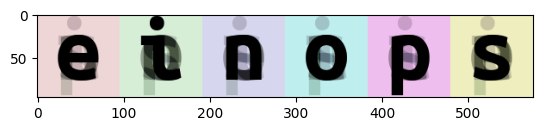

In [50]:
image = e.einsum(images, mean_image, 'b h w c, h w c -> b h w c')
image = e.rearrange(image, 'b h w c -> h (b w) c')
show(image)